In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.head()
data = pd.read_csv('../data/earthquake/train_values.csv')
data.head()
combined_data = pd.merge(data, labels, on='building_id')

In [3]:
# initial data analysis
data.info()
labels.info()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
data_frame = combined_data[['count_floors_pre_eq','damage_grade']]
data_frame.head()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   count_floors_pre_eq  260601 non-null  int64
 1   damage_grade         260601 non-null  int64
dtypes: int64(2)
memory usage: 6.0 MB


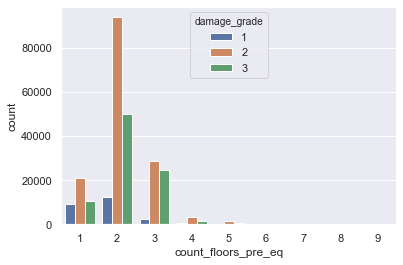

In [5]:
sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=data_frame)

In [24]:
# Find percentage of bulidings damaged/destroyed for each type of floor
for x in range(1,10):
    processed_data_frame = combined_data.copy(deep=True)
    processed_data_frame.head()
    floor_data_frame = processed_data_frame[processed_data_frame['count_floors_pre_eq']==x]
    floor_data_frame.head()
    collapsed = len(floor_data_frame[floor_data_frame['damage_grade'] == 3])
    damaged = len(floor_data_frame[floor_data_frame['damage_grade'] == 2])
    intact = len(floor_data_frame[floor_data_frame['damage_grade'] == 1])
    total = intact+damaged+collapsed
    result = (damaged+collapsed)/total
    print("floors: "+ str(x)+" Percentage: "+str(result))

floors: 1 Percentage: 0.7782201231423556
floors: 2 Percentage: 0.9195967386654578
floors: 3 Percentage: 0.9543844507974181
floors: 4 Percentage: 0.8696533923303835
floors: 5 Percentage: 0.8869100623330365
floors: 6 Percentage: 0.7464114832535885
floors: 7 Percentage: 0.7435897435897436
floors: 8 Percentage: 1.0
floors: 9 Percentage: 0.0
